In [1]:
%pip install seaborn
%pip install plotly.express
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


DATA_TRAIN

In [2]:
data_train = pd.read_csv("C:\workspace\Le système IDS\kdd_train.csv")


In [3]:
data_train.head()


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate   labels  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  neptune  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
data_train.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
data_train.shape

(125973, 42)

In [7]:
# Mise à l'échelle des caractéristiques numériques
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les caractéristiques numériques
numeric_features = data_train.select_dtypes(include=['int64', 'float64']).columns

# Mise à l'échelle des caractéristiques numériques
scaler = StandardScaler()
data_train[numeric_features] = scaler.fit_transform(data_train[numeric_features])
print(data_train[numeric_features])



        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

In [8]:
#Convertissez la variable cible 'labels'en format binaire.
data_train['labels_binary'] = data_train['labels'].apply(lambda x: 0 if x == 'normal' else 1)
print(data_train['labels_binary'])



0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: labels_binary, Length: 125973, dtype: int64


In [9]:
data_train.drop(columns=['labels'],  inplace=True)

data_train

duration protocol_type   service flag  src_bytes  dst_bytes      land  \
0      -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919 -0.014089   
1      -0.110249           udp     other   SF  -0.007737  -0.004919 -0.014089   
2      -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
3      -0.110249           tcp      http   SF  -0.007723  -0.002891 -0.014089   
4      -0.110249           tcp      http   SF  -0.007728  -0.004814 -0.014089   
...          ...           ...       ...  ...        ...        ...       ...   
125968 -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
125969 -0.107178           udp   private   SF  -0.007744  -0.004883 -0.014089   
125970 -0.110249           tcp      smtp   SF  -0.007382  -0.004823 -0.014089   
125971 -0.110249           tcp    klogin   S0  -0.007762  -0.004919 -0.014089   
125972 -0.110249           tcp  ftp_data   SF  -0.007737  -0.004919 -0.014089   

        wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0            -0.089486 -0.007736 -0.095076  ...           -0.818890   
1            -0.089486 -0.007736 -0.095076  ...           -1.035688   
2            -0.089486 -0.007736 -0.095076  ...           -0.809857   
3            -0.089486 -0.007736 -0.095076  ...            1.258754   
4            -0.089486 -0.007736 -0.095076  ...            1.258754   
...                ...       ...       ...  ...                 ...   
125968       -0.089486 -0.007736 -0.095076  ...           -0.818890   
125969       -0.089486 -0.007736 -0.095076  ...            1.159389   
125970       -0.089486 -0.007736 -0.095076  ...           -0.773724   
125971       -0.089486 -0.007736 -0.095076  ...           -0.972455   
125972       -0.089486 -0.007736 -0.095076  ...           -0.349162   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    -0.782367               -0.280282   
1                    -1.161030                2.736852   
2                    -0.938287               -0.174417   
3                     1.066401               -0.439078   
4                     1.066401               -0.439078   
...                        ...                     ...   
125968               -0.938287               -0.121485   
125969                0.977304               -0.386146   
125970               -0.893738               -0.121485   
125971               -1.094207               -0.174417   
125972               -0.492801               -0.280282   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.069972                    -0.289103   
1                          2.367737                    -0.289103   
2                         -0.480197                    -0.289103   
3                         -0.383108                     0.066252   
4                         -0.480197                    -0.289103   
...                             ...                          ...   
125968                    -0.480197                    -0.289103   
125969                    -0.447834                    -0.289103   
125970                    -0.480197                    -0.289103   
125971                    -0.480197                    -0.289103   
125972                     0.490690                    -0.289103   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  -0.639532                 -0.624871             -0.224532   
1                  -0.639532                 -0.624871             -0.387635   
2                   1.608759                  1.618955             -0.387635   
3                  -0.572083                 -0.602433             -0.387635   
4                  -0.639532                 -0.624871             -0.387635   
...                      ...                       ...                   ...   
125968              1.608759                  1.618955             -0.387635   
125969             -0.639532

In [10]:
# Liste des caractéristiques catégorielles à encoder
categorical_features = ['protocol_type', 'service', 'flag']
# Appliquez le one-hot encoding avec get_dummies
dummies= pd.get_dummies(data_train, columns=categorical_features)
data_train_processed= pd.concat([data_train, dummies], axis=1)
# Supprimez les colonnes catégorielles d'origine
data_train_processed.drop(categorical_features, axis=1, inplace=True)
# Affichez le DataFrame résultant
print(data_train_processed)

data_train_processed.dtypes

        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

duration          float64
src_bytes         float64
dst_bytes         float64
land              float64
wrong_fragment    float64
                   ...   
flag_S1              bool
flag_S2              bool
flag_S3              bool
flag_SF              bool
flag_SH              bool
Length: 162, dtype: object

In [11]:
from sklearn.decomposition import PCA

import numpy as np
X = data_train_processed.drop(columns=['labels_binary'])

# Définir le seuil de variance
variance_threshold = 0.90

# Initialiser PCA
pca = PCA(n_components=None)

# Adapter PCA aux données
pca.fit(X)

# Calculer le nombre optimal de composantes à retenir
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_features = np.argmax(cumulative_variance >= variance_threshold) + 1

# Réinitialiser PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_features)
pca_optimal.fit(X)

# Caractéristiques retenues
selected_features = pca_optimal.transform(X)
print(selected_features)



[[-1.00937251e+00 -1.01295120e-01 -2.39845155e-02 ... -3.45458994e-02
  -4.69907615e-01  2.83587306e-01]
 [ 7.65494634e-01  1.57084224e+00  2.43806979e-02 ... -1.11350771e-01
  -5.46724475e-01  3.83319132e-01]
 [ 5.34937944e+00 -2.08508439e+00  2.95330932e-02 ...  4.15876089e-02
   1.08979120e-02 -6.38965613e-03]
 ...
 [-5.52754521e-01 -8.89726973e-01  5.76897565e-02 ...  2.97791047e-02
   1.08026817e-01  1.58885883e-01]
 [ 5.47660802e+00 -2.07214810e+00  3.59241147e-02 ...  4.24905722e-02
   1.24893614e-02  1.19175349e-02]
 [-1.80888520e+00 -5.76477861e-01 -2.63113496e-03 ...  4.51910471e-02
  -1.29239900e-01  2.09564818e-01]]


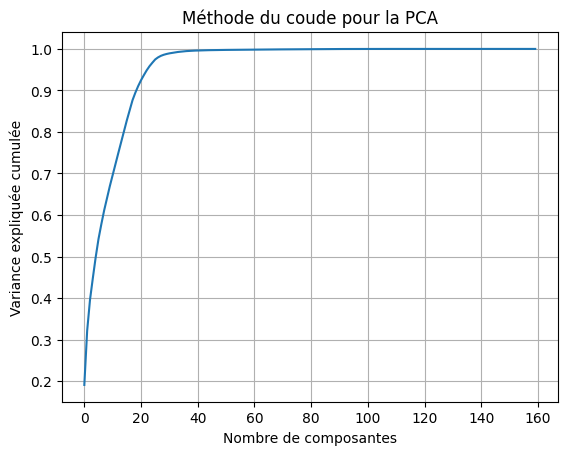

In [12]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Calculer la PCA
pca = PCA()
pca.fit(X)

# Plotting Elbow method
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Méthode du coude pour la PCA')
plt.grid(True)
plt.show()


In [13]:
# Définir le seuil de variance
variance_threshold = 1

# Initialiser PCA
pca = PCA(n_components=40)

# Adapter PCA aux données
pca.fit(X)

# Calculer le nombre optimal de composantes à retenir
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_features = np.argmax(cumulative_variance >= variance_threshold) + 1

# Réinitialiser PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_features)
pca_optimal.fit(X)

# Caractéristiques retenues
selected_features = pca_optimal.transform(X)
print(selected_features)



[[-1.00937249]
 [ 0.76549457]
 [ 5.34937945]
 ...
 [-0.55275452]
 [ 5.47660803]
 [-1.80888521]]


DATA_test 

In [14]:
data_test = pd.read_csv("C:\workspace\Le système IDS\kdd_test.csv")
data_test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         5           tcp      smtp    SF       2429        475     0   
1         0           udp  domain_u    SF         45        134     0   
2         0           udp  domain_u    SF         45         80     0   
3      1979           udp     other    SF        145        105     0   
4     14462           tcp     other  RSTR          1          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  57   
1               0       0    0  ...                 155   
2               0       0    0  ...                 255   
3               0       0    0  ...                   2   
4               0       0    0  ...                   2   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.11                    0.02   
1                    0.80                    0.02   
2                    1.00                    0.00   
3                    0.01                    0.84   
4                    0.01                    0.68   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.01                         0.04   
1                         0.01                         0.00   
2                         0.01                         0.00   
3                         1.00                         0.00   
4                         1.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.87   
1                   0.0                       0.0                  0.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  1.00   

   dst_host_srv_rerror_rate     labels  
0                       0.0     normal  
1                       0.0     normal  
2                       0.0     normal  
3                       0.0     normal  
4                       1.0  portsweep  

[5 rows x 42 columns]

In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [16]:
data_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
data_test.shape

(22544, 42)

In [18]:
# Mise à l'échelle des caractéristiques numériques
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les caractéristiques numériques
numeric_features = data_test.select_dtypes(include=['int64', 'float64']).columns

# Mise à l'échelle des caractéristiques numériques
scaler = StandardScaler()
data_test[numeric_features] = scaler.fit_transform(data_test[numeric_features])
print(data_test[numeric_features])


       duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0     -0.116219  -0.021090  -0.039596 -0.009419        -0.07811 -0.010877   
1     -0.118508  -0.026199  -0.045014 -0.009419        -0.07811 -0.010877   
2     -0.118508  -0.026199  -0.045873 -0.009419        -0.07811 -0.010877   
3      0.787500  -0.025985  -0.045475 -0.009419        -0.07811 -0.010877   
4      6.502357  -0.026294  -0.047144 -0.009419        -0.07811 -0.010877   
...         ...        ...        ...       ...             ...       ...   
22539 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22540 -0.118508  -0.025751  -0.010961 -0.009419        -0.07811 -0.010877   
22541 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22542 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22543 -0.118508  -0.026201  -0.045094 -0.009419        -0.07811 -0.010877   

            hot  num_failed_logins  logged_in  num_compromised  ...  \
0   

In [19]:
#Convertissez la variable cible 'labels'en format binaire.
data_test['labels_binary'] = data_test['labels'].apply(lambda x: 0 if x == 'normal' else 1)
print(data_test['labels_binary'])

0        0
1        0
2        0
3        0
4        1
        ..
22539    1
22540    0
22541    1
22542    1
22543    0
Name: labels_binary, Length: 22544, dtype: int64


In [20]:
data_test.drop(columns=['labels'],  inplace=True)

data_test

duration protocol_type   service  flag  src_bytes  dst_bytes      land  \
0     -0.116219           tcp      smtp    SF  -0.021090  -0.039596 -0.009419   
1     -0.118508           udp  domain_u    SF  -0.026199  -0.045014 -0.009419   
2     -0.118508           udp  domain_u    SF  -0.026199  -0.045873 -0.009419   
3      0.787500           udp     other    SF  -0.025985  -0.045475 -0.009419   
4      6.502357           tcp     other  RSTR  -0.026294  -0.047144 -0.009419   
...         ...           ...       ...   ...        ...        ...       ...   
22539 -0.118508           tcp   private   REJ  -0.026296  -0.047144 -0.009419   
22540 -0.118508           tcp      http    SF  -0.025751  -0.010961 -0.009419   
22541 -0.118508           tcp   private    S0  -0.026296  -0.047144 -0.009419   
22542 -0.118508           tcp   private  RSTR  -0.026296  -0.047144 -0.009419   
22543 -0.118508           udp  domain_u    SF  -0.026201  -0.045094 -0.009419   

       wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0            -0.07811 -0.010877 -0.091546  ...           -0.592691   
1            -0.07811 -0.010877 -0.091546  ...            0.285640   
2            -0.07811 -0.010877 -0.091546  ...            1.181897   
3            -0.07811 -0.010877 -0.091546  ...           -1.085632   
4            -0.07811 -0.010877 -0.091546  ...           -1.085632   
...               ...       ...       ...  ...                 ...   
22539        -0.07811 -0.010877 -0.091546  ...           -1.094594   
22540        -0.07811 -0.010877 -0.091546  ...            1.181897   
22541        -0.07811 -0.010877 -0.091546  ...           -0.879493   
22542        -0.07811 -0.010877 -0.091546  ...           -1.094594   
22543        -0.07811 -0.010877 -0.091546  ...            1.181897   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                   -0.974283               -0.324834   
1                    0.569104               -0.324834   
2                    1.016463               -0.424929   
3                   -1.197962                3.779090   
4                   -1.197962                2.978325   
...                       ...                     ...   
22539               -1.220330                4.579856   
22540                1.016463               -0.424929   
22541               -0.996651               -0.074594   
22542               -1.220330                2.477846   
22543                1.016463               -0.424929   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                        -0.429145                     0.110651   
1                        -0.429145                    -0.266835   
2                        -0.429145                    -0.266835   
3                         2.811112                    -0.266835   
4                         2.811112                    -0.266835   
...                            ...                          ...   
22539                    -0.461875                    -0.266835   
22540                    -0.330956                     0.110651   
22541                    -0.461875                    -0.266835   
22542                     1.403727                    -0.266835   
22543                    -0.461875                    -0.266835   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                 -0.558559                 -0.547234              2.107579   
1                 -0.558559                 -0.547234             -0.456918   
2                 -0.558559                 -0.547234             -0.456918   
3                 -0.558559                 -0.547234             -0.456918   
4                 -0.558559                 -0.547234              2.490779   
...                     ...                       ...                   ...   
22539             -0.339397                 -0.547234              2.225486   
22540             -0.558559                 -0.547234             -0.45

In [21]:
# Liste des caractéristiques catégorielles à encoder
categorical_features = ['protocol_type', 'service', 'flag']
# Appliquez le one-hot encoding avec get_dummies
dummies= pd.get_dummies(data_test, columns=categorical_features)
data_test_processed= pd.concat([data_test, dummies], axis=1)
# Supprimez les colonnes catégorielles d'origine
data_test_processed.drop(categorical_features, axis=1, inplace=True)
# Affichez le DataFrame résultant
print(data_test_processed)

data_test_processed.dtypes

       duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0     -0.116219  -0.021090  -0.039596 -0.009419        -0.07811 -0.010877   
1     -0.118508  -0.026199  -0.045014 -0.009419        -0.07811 -0.010877   
2     -0.118508  -0.026199  -0.045873 -0.009419        -0.07811 -0.010877   
3      0.787500  -0.025985  -0.045475 -0.009419        -0.07811 -0.010877   
4      6.502357  -0.026294  -0.047144 -0.009419        -0.07811 -0.010877   
...         ...        ...        ...       ...             ...       ...   
22539 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22540 -0.118508  -0.025751  -0.010961 -0.009419        -0.07811 -0.010877   
22541 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22542 -0.118508  -0.026296  -0.047144 -0.009419        -0.07811 -0.010877   
22543 -0.118508  -0.026201  -0.045094 -0.009419        -0.07811 -0.010877   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_R

duration          float64
src_bytes         float64
dst_bytes         float64
land              float64
wrong_fragment    float64
                   ...   
flag_S1              bool
flag_S2              bool
flag_S3              bool
flag_SF              bool
flag_SH              bool
Length: 158, dtype: object

In [22]:
X1 = data_test_processed.drop(columns=['labels_binary'])

# Définir le seuil de variance
variance_threshold = 0.90

# Initialiser PCA
pca = PCA(n_components=None)

# Adapter PCA aux données
pca.fit(X1)

# Calculer le nombre optimal de composantes à retenir
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_features = np.argmax(cumulative_variance >= variance_threshold) + 1

# Réinitialiser PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_features)
pca_optimal.fit(X1)

# Caractéristiques retenues
selected_features = pca_optimal.transform(X1)
print(selected_features)

[[-1.17311226e+00  1.01703357e+00  2.91091363e-03 ... -7.32801425e-01
   5.11048657e-01 -9.88520381e-01]
 [-1.57649118e+00 -4.32016859e-01 -3.03135243e-01 ...  3.27294354e-01
  -1.06766781e-01  1.00897682e-01]
 [-2.11563885e+00 -5.69099630e-01 -2.93384808e-01 ...  3.46854041e-01
   1.25951516e-01 -6.01153085e-01]
 ...
 [ 5.52846322e+00 -3.59418526e+00  9.58184724e-03 ...  9.77706751e-03
  -1.32881711e-01  2.68585060e-01]
 [ 3.28275916e+00  6.73854301e+00 -2.97639294e-02 ... -1.49465548e-01
   1.90014279e-01 -5.39418993e-01]
 [-2.28904971e+00 -6.07450778e-01 -2.93727706e-01 ...  4.48124658e-01
   1.74122900e-01 -7.19124743e-01]]


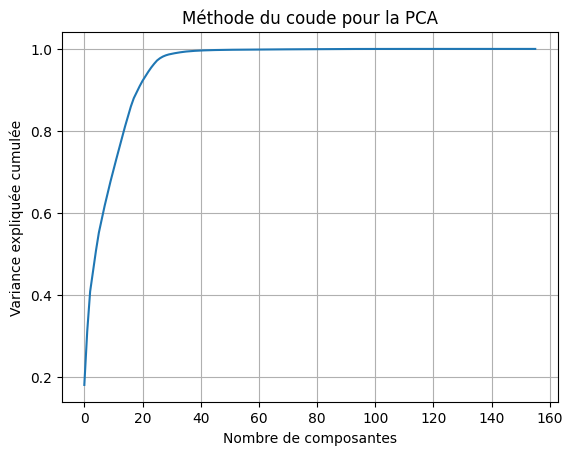

In [23]:
# Calculer la PCA
pca = PCA()
pca.fit(X1)

# Plotting Elbow method
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Méthode du coude pour la PCA')
plt.grid(True)
plt.show()

In [24]:
# Définir le seuil de variance
variance_threshold = 1

# Initialiser PCA
pca = PCA(n_components=40)

# Adapter PCA aux données
pca.fit(X1)

# Calculer le nombre optimal de composantes à retenir
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_features = np.argmax(cumulative_variance >= variance_threshold) + 1

# Réinitialiser PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_features)
pca_optimal.fit(X1)

# Caractéristiques retenues
selected_features = pca_optimal.transform(X1)
print(selected_features)

[[-1.17311226]
 [-1.57649118]
 [-2.11563883]
 ...
 [ 5.52846322]
 [ 3.28275909]
 [-2.28904969]]


le choix d'algorithme


In [25]:
data_train_processed.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

In [26]:
from sklearn.model_selection import  cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Diviser les données en ensembles d'entraînement et de test, supprimmer des colonnes de data_train car n'exitent pas dans data_test
columns_to_drop = ['labels_binary','service_harvest', 'service_http_2784','service_http_8001','service_tftp_u']

X_train=data_train_processed.drop(columns=columns_to_drop,axis=1 )
y_train=data_train_processed['labels_binary']

X_test=data_test_processed.drop('labels_binary', axis=1)
y_test=data_test_processed['labels_binary']

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Entraîner le modèle decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Validation croisée pour évaluer la performance
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
cv_scores_dt= cross_val_score(dt_model, X_train, y_train, cv=5)
# Afficher les scores de validation croisée
print("Scores de validation croisée Random Forest :", cv_scores_rf)
print("Moyenne des Scores:", cv_scores_rf.mean())
print("Scores de validation croisée Decision Tree :", cv_scores_dt)
print("Moyenne des Scores:", cv_scores_dt.mean())




Scores de validation croisée Random Forest : [0.99888867 0.99912681 0.99888867 0.99888862 0.99904739]
Moyenne des Scores: 0.9989680328320423
Scores de validation croisée Decision Tree : [0.998333   0.99845207 0.99841238 0.9980154  0.99884893]
Moyenne des Scores: 0.99841235851822


Justifiez pourquoi mettre l'accent sur le rappel est important (1 pt).
-Maîtriser les effets négatifs : Le rappel évalue l'efficacité d'un modèle pour détecter les intrusions. En l'absence de nombreuses intrusions (faux négatifs) dans le modèle, cela peut représenter un risque majeur pour la sécurité, ce qui rend essentiel de réduire ces erreurs.
-En mettant l'accent sur le rappel, il est possible de tolérer davantage de fausses alertes (faux positifs) si cela implique de détecter davantage d'intrusions réelles. Il est parfois préférable d'avoir une quantité excessive d'alertes plutôt que d'en manquer qui pourraient constituer des menaces sérieuses.
-Évaluation des résultats du modèle : En accordant une importance particulière au rappel, il est possible de mieux évaluer la capacité du modèle à détecter les véritables menaces. Cela permet d'observer son comportement dans des situations réelles et de l'améliorer. 



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, multilabel_confusion_matrix

def evaluate_classification(model, X, y):
    # Prédire les classes pour chaque exemple
    y_pred = model.predict(X)
    
    # Calculer les métriques d'évaluation
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')
    beta = 2  # On choisit beta=2 pour mettre plus d'importance sur le rappel
    f1 = fbeta_score(y, y_pred, beta=beta, average='micro')
    
    # Calculer la matrice de confusion pour les données multilabel
    cm = multilabel_confusion_matrix(y, y_pred)
    
    results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }
    
    return results

# Utilisation de la fonction avec 'average'='micro'
evaluation_results_rf = evaluate_classification(rf_model, X_test, y_test)
print(evaluation_results_rf)

evaluation_results_dt = evaluate_classification(dt_model, X_test, y_test)
print(evaluation_results_dt)



{'Accuracy': 0.907957771469127, 'Precision': 0.9414241960183767, 'Recall': 0.8705195150013275, 'F1 Score': 0.8838329379627633, 'Confusion Matrix': array([[[10633,   612],
        [ 1463,  9836]],

       [[10633,   612],
        [ 1463,  9836]]], dtype=int64)}
{'Accuracy': 0.7970635202271115, 'Precision': 0.727592743027349, 'Recall': 0.9512346225329675, 'F1 Score': 0.8961446104589115, 'Confusion Matrix': array([[[ 7221,  4024],
        [  551, 10748]],

       [[ 7221,  4024],
        [  551, 10748]]], dtype=int64)}


In [29]:
import pandas as pd

# Assuming you have the evaluation metrics for each algorithm
evaluation_metrics = {
    'Algorithm': ['Random Forest', 'Decision Tree'],
    'F1-score': [0.8747607377327776,0.8962067875035369],  
    'Precision': [0.91359177954227, 0.7234800134363453],  
    'Recall': [ 0.8655633241879812, 0.9530931940879724],  
    'Accuracy': [0.8915897799858056,0.7939141234918382]  
}

# Create a DataFrame from the evaluation metrics dictionary
df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(df)



       Algorithm  F1-score  Precision    Recall  Accuracy
0  Random Forest  0.874761   0.913592  0.865563  0.891590
1  Decision Tree  0.896207   0.723480  0.953093  0.793914


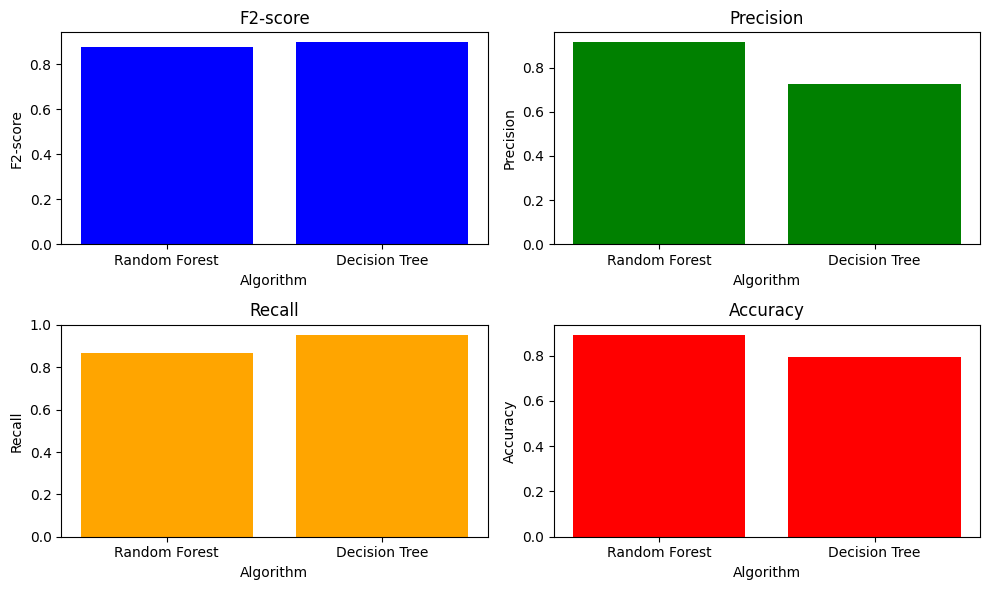

In [30]:
import pandas as pd
import matplotlib.pyplot as plt  # Add this line to import matplotlib



# Create a DataFrame from the performance metrics dictionary
df = pd.DataFrame(evaluation_metrics)

# Plotting Graphical Visualization of Results
plt.figure(figsize=(10, 6))

# Plotting F2-score
plt.subplot(221)
plt.bar(df['Algorithm'], df['F1-score'], color='blue')
plt.title('F2-score')
plt.xlabel('Algorithm')
plt.ylabel('F2-score')

# Plotting Precision
plt.subplot(222)
plt.bar(df['Algorithm'], df['Precision'], color='green')
plt.title('Precision')
plt.xlabel('Algorithm')
plt.ylabel('Precision')

# Plotting Recall
plt.subplot(223)
plt.bar(df['Algorithm'], df['Recall'], color='orange')
plt.title('Recall')
plt.xlabel('Algorithm')
plt.ylabel('Recall')

# Plotting Accuracy
plt.subplot(224)
plt.bar(df['Algorithm'], df['Accuracy'], color='red')
plt.title('Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
